In [92]:
import pandas as pd
pd.set_option('max_columns', 300)
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from collections import Counter

In [93]:
main = pd.read_csv('main.csv')
maps = pd.read_csv('maps.csv') 
stats = pd.read_csv('stats.csv')

C:\programs\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [94]:
main.head()

,Unnamed: 0,date,event,event_href,match_href,online,prizepool,result1,result2,team1,team2,time
0,0,14th of March 2020,HardCup 6,/events/5249/hardcup-6,/matches/2340435/ethereal-vs-firenation-hardcup-6,0.0,"$4,200",2,0,EthereaL,FiRENATiON,22:50
1,1,5th of March 2020,Flashpoint 1 Global Qualifier - Pinnacle Open,/events/5210/flashpoint-1-global-qualifier-pin...,/matches/2339808/orgless-vs-chaos-flashpoint-1...,0.0,"$64,000 + 2 spots at Flashpoint 1",2,1,Orgless,Chaos,21:05
2,2,5th of March 2020,Flashpoint 1 Global Qualifier - Pinnacle Open,/events/5210/flashpoint-1-global-qualifier-pin...,/matches/2339809/havu-vs-big-flashpoint-1-glob...,0.0,"$64,000 + 2 spots at Flashpoint 1",0,2,HAVU,BIG,18:10
3,3,5th of March 2020,Flashpoint 1 Global Qualifier - Pinnacle Open,/events/5210/flashpoint-1-global-qualifier-pin...,/matches/2339807/copenhagen-flames-vs-chaos-fl...,0.0,"$64,000 + 2 spots at Flashpoint 1",1,2,Copenhagen Flames,Chaos,02:15
4,4,4th of March 2020,Flashpoint 1 Global Qualifier - Pinnacle Open,/events/5210/flashpoint-1-global-qualifier-pin...,/matches/2339806/detona-vs-big-flashpoint-1-gl...,0.0,"$64,000 + 2 spots at Flashpoint 1",0,2,DETONA,BIG,23:40


In [95]:
maps.head()

,Unnamed: 0,half_results,map_name,match_href,pick,result1,result2,star
0,0,-,Default,/matches/2340435/ethereal-vs-firenation-hardcup-6,dec,-,-,Best of 3 (LAN)* Grand final** Ethereal has a ...
1,1,"(9:6, 7:1)",Train,/matches/2340435/ethereal-vs-firenation-hardcup-6,FiRENATiON,16,7,Best of 3 (LAN)* Grand final** Ethereal has a ...
2,2,-,Mirage,/matches/2340435/ethereal-vs-firenation-hardcup-6,EthereaL,-,-,Best of 3 (LAN)* Grand final** Ethereal has a ...
3,3,"(13:2, 3:4)",Overpass,/matches/2339808/orgless-vs-chaos-flashpoint-1...,Chaos,16,6,Best of 3 (LAN)* Semi-final. Winner qualifies ...
4,4,"(7:8, 5:8)",Nuke,/matches/2339808/orgless-vs-chaos-flashpoint-1...,Orgless,12,16,Best of 3 (LAN)* Semi-final. Winner qualifies ...


In [96]:
stats.head()

,Unnamed: 0,match_href,player_adr,player_kd,player_name,player_rating,team_name
0,0,/matches/2340435/ethereal-vs-firenation-hardcup-6,95.1,23-8,Deffo,1.63,EthereaL
1,1,/matches/2340435/ethereal-vs-firenation-hardcup-6,87.2,21-11,RubeN,1.49,EthereaL
2,2,/matches/2340435/ethereal-vs-firenation-hardcup-6,86.9,18-12,LostDF,1.47,EthereaL
3,3,/matches/2340435/ethereal-vs-firenation-hardcup-6,99.1,22-13,KENSI,1.45,EthereaL
4,4,/matches/2340435/ethereal-vs-firenation-hardcup-6,75.3,13-13,Norwi,1.02,EthereaL


In [97]:
gb_rating = stats.groupby(['match_href','team_name'])['player_rating']

In [98]:
np.unique(main.prizepool)

array(['$1,000', '$1,000,000', '$1,019', '$1,025', '$1,053', '$1,100',
       '$1,130', '$1,135', '$1,150', '$1,200', '$1,250',
       '$1,280 + 2 spots at SEA Fire Championship 2019', '$1,290',
       '$1,300', '$1,305', '$1,330', '$1,350', '$1,400', '$1,430',
       '$1,450', '$1,460', '$1,495', '$1,500',
       '$1,500 + 3 spots at MDL S33 Global Challenge', '$1,625', '$1,635',
       '$1,685', '$1,693', '$1,700', '$1,750', '$1,800', '$1,900',
       '$1,910', '$10,000', '$10,000 + crowdfunding', '$10,003',
       '$10,116', '$10,300', '$10,385',
       '$10,500 + 2 spots to ESL Pro League Season 9 Americas', '$10,542',
       '$10,711', '$10,745', '$10,847', '$100,000',
       '$100,000 + 1 spot at DH Masters Jonkoping', '$105,000', '$11,000',
       '$11,010', '$11,073', '$11,100', '$11,116',
       '$11,145 + spot at Arctic Invitational', '$11,150', '$11,200',
       '$11,265', '$11,300', '$11,335', '$11,376', '$11,400', '$11,500',
       '$11,573', '$11,746', '$11,750', '$11,950

In [99]:
prize = []
for i in range(len(main)):
    prize.append(main['prizepool'][i].split(' ')[0])

In [100]:
prize = pd.Series(prize).apply(lambda x: 0 if '$' not in x else x)

In [101]:
main['prizepool'] = prize.apply(lambda x : str(x).replace('$','').replace(',',''))

In [102]:
maps.shape

(35103, 8)

In [103]:
maps['result1'] = maps['result1'].apply(lambda x : str(x).replace('-','-1'))
maps['result2'] = maps['result2'].apply(lambda x : str(x).replace('-','-1'))
maps = maps[(maps['result1'] != '-1')|(maps['result2'] != '-1')]

In [104]:
maps.reset_index(drop = True, inplace = True)

In [105]:
def month_to_number(month):
    if month == 'January':
        return '01'
    elif month == 'February':
        return '02'
    elif month == 'March':
        return '03'
    elif month == 'April':
        return '04'
    elif month == 'May':
        return '05'
    elif month == 'June':
        return '06'
    elif month == 'July':
        return '07'
    elif month == 'August':
        return '08'
    elif month == 'September':
        return '09'
    elif month == 'October':
        return '10'
    elif month == 'November':
        return '11'
    elif month == 'December':
        return '3'
    else:
        raise ValueError('Inadequate month format')

def date_trans(date):
    date = date.split()
    day = date[0][:-2]
    if len(day) == 1:
        day = '0' + day
    elif len(day) == 2:
        pass
    else:
        raise ValueError('Inadequate day format')
    month = month_to_number(date[2])
    year = date[3]
    return f'{day}-{month}-{year}'

main.date = main.date.apply(date_trans)

In [106]:
from datetime import datetime as dt
main.date = main.date.apply(lambda x: dt.strptime(x, '%d-%m-%Y'))
main.dtypes

Unnamed: 0             int64
date          datetime64[ns]
event                 object
event_href            object
match_href            object
online               float64
prizepool             object
result1                int64
result2                int64
team1                 object
team2                 object
time                  object
dtype: object

In [107]:
main['prizepool'] = main['prizepool'].astype(int)

In [108]:
del maps['Unnamed: 0']
del main['Unnamed: 0']
del stats['Unnamed: 0']

In [212]:
df = pd.merge(maps, right = main, how = 'left', left_on = 'match_href', right_on = 'match_href')

In [213]:
df.isnull().sum()

half_results    61
map_name         0
match_href       0
pick             0
result1_x        0
result2_x        0
star             0
date             0
event            0
event_href       0
online           0
prizepool        0
result1_y        0
result2_y        0
team1            0
team2            0
time             0
dtype: int64

In [214]:
df.fillna(0, inplace = True)

In [215]:
len(np.unique(df['team2']))

1389

In [216]:
c = Counter(df['pick'])

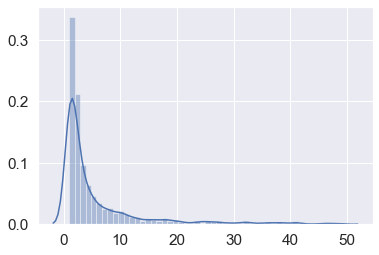

In [217]:
sns.distplot([x for x in tuple(c.values()) if x < 50])

In [218]:
teams = pd.DataFrame()
teams['keys'] = c.keys()
teams['values'] = c.values()

In [219]:
df = pd.merge(df, right = teams, how = 'left', left_on = 'team1', right_on = 'keys' )

In [220]:
df = df[df['values'] > 20].reset_index(drop = True)

In [221]:
df['win'] = df['result1_x'].apply(lambda x : 1 if x == '16' else 0)

In [222]:
df['map_pick'] = (df['pick'] == df['team1']).astype(int)

In [223]:
df['prizepool'] = df['prizepool'].astype(int)
tier = df.groupby('pick').prizepool.mean().reset_index()
df = pd.merge(df, right = tier, how = 'left', left_on = 'team1', right_on = 'pick')
df = pd.merge(df, right = tier, how = 'left', left_on = 'team2', right_on = 'pick')

In [224]:
df = df.sort_values(by='date')

In [225]:
dat = df.groupby(['date', 'team1', 'map_name']).win.agg(['sum', 'count'])
dat = dat.unstack().unstack().rolling(180, min_periods=8).sum().stack().stack()
dat['win_rate_1'] = dat['sum'] / dat['count']
del dat['count']
del dat['sum']
dat = dat.reset_index()

df = df.merge(dat, on=['date', 'team1', 'map_name'], how='left')

dat = df.groupby(['date', 'team2', 'map_name']).win.agg(['sum', 'count'])
dat = dat.unstack().unstack().rolling(180, min_periods=8).sum().stack().stack()
dat['win_rate_2'] = 1 - dat['sum'] / dat['count']
del dat['count']
del dat['sum']
dat = dat.reset_index()

df = df.merge(dat, on=['date', 'team2', 'map_name'], how='left')

In [226]:
stats = pd.read_csv('stats.csv')
del stats['Unnamed: 0']
stats['player_rating'] = stats['player_rating'].astype(float)

C:\programs\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [227]:
stats = stats.merge(df[['match_href', 'date']], on='match_href')

In [228]:
stats = stats.sort_values(by='date')
stats.head()

,match_href,player_adr,player_kd,player_name,player_rating,team_name,date
515727,/matches/2330141/pact-vs-x-kom-pixelbet-brawl-...,37.1,10-11,oskarish,0.85,x-kom,2019-01-04
515700,/matches/2330141/pact-vs-x-kom-pixelbet-brawl-...,74.7,23-15,Goofy,1.34,x-kom,2019-01-04
515701,/matches/2330141/pact-vs-x-kom-pixelbet-brawl-...,78.8,18-17,oskarish,1.20,x-kom,2019-01-04
515702,/matches/2330141/pact-vs-x-kom-pixelbet-brawl-...,78.8,18-17,oskarish,1.20,x-kom,2019-01-04
515703,/matches/2330141/pact-vs-x-kom-pixelbet-brawl-...,56.8,19-15,jedqr,1.09,x-kom,2019-01-04


In [229]:
dat = stats.groupby(['date', 'team_name']).player_rating.agg(['sum', 'count'])
dat.unstack().rolling(180, min_periods=8).sum().stack()
dat['avg_player_rating'] = dat['sum'] / dat['count']
del dat['count']
del dat['sum']
dat = dat.reset_index()

df = df.merge(dat, right_on=['date', 'team_name'], left_on=['date', 'team1'],  how='left')
df = df.merge(dat, right_on=['date', 'team_name'], left_on=['date', 'team2'],  how='left')
del df['team_name_x']
del df['team_name_y']
del dat
df.head()

,half_results,map_name,match_href,pick_x,result1_x,result2_x,star,date,event,event_href,online,prizepool_x,result1_y,result2_y,team1,team2,time,keys,values,win,map_pick,pick_y,prizepool_y,pick,prizepool,win_rate_1,win_rate_2,avg_player_rating_x,avg_player_rating_y
0,"(5:10, 6:6)",Inferno,/matches/2330141/pact-vs-x-kom-pixelbet-brawl-...,x-kom,11,16,Best of 3* Group B decider match,2019-01-04,Pixel.bet Brawl: Nordic vs. Europe,/events/4273/pixelbet-brawl-nordic-vs-europe,1.0,10000,0,2,PACT,x-kom,17:00,PACT,137.0,0,0,PACT,19562.947368,x-kom,17511.403509,NaN,NaN,0.882667,1.186000
1,"(4:11, 5:5)",Mirage,/matches/2330141/pact-vs-x-kom-pixelbet-brawl-...,PACT,9,16,Best of 3* Group B decider match,2019-01-04,Pixel.bet Brawl: Nordic vs. Europe,/events/4273/pixelbet-brawl-nordic-vs-europe,1.0,10000,0,2,PACT,x-kom,17:00,PACT,137.0,0,1,PACT,19562.947368,x-kom,17511.403509,NaN,NaN,0.882667,1.186000
2,"(3:12, 11:4)",Overpass,/matches/2330164/london-vs-endpoint-esl-premie...,Endpoint,14,16,Best of 3 (LAN)* Grand final,2019-01-05,ESL Premiership Winter 2018 Finals,/events/4343/esl-premiership-winter-2018-finals,0.0,12700,2,1,London,Endpoint,19:20,London,22.0,0,0,London,6506.176471,Endpoint,26191.448819,NaN,NaN,1.232000,1.056889
3,"(9:6, 7:2)",Inferno,/matches/2330164/london-vs-endpoint-esl-premie...,London,16,8,Best of 3 (LAN)* Grand final,2019-01-05,ESL Premiership Winter 2018 Finals,/events/4343/esl-premiership-winter-2018-finals,0.0,12700,2,1,London,Endpoint,19:20,London,22.0,1,1,London,6506.176471,Endpoint,26191.448819,NaN,NaN,1.232000,1.056889
4,"(13:2, 3:5)",Mirage,/matches/2330164/london-vs-endpoint-esl-premie...,dec,16,7,Best of 3 (LAN)* Grand final,2019-01-05,ESL Premiership Winter 2018 Finals,/events/4343/esl-premiership-winter-2018-finals,0.0,12700,2,1,London,Endpoint,19:20,London,22.0,1,0,London,6506.176471,Endpoint,26191.448819,NaN,NaN,1.232000,1.056889


In [230]:
from sklearn.preprocessing import OrdinalEncoder

In [231]:
oe = OrdinalEncoder()

In [232]:
oe.fit(df[['map_name','team1','team2']])
df[['map_name','team1','team2']] = oe.transform(df[['map_name','team1','team2']])

In [233]:
import lightgbm as lgb

In [234]:
X = df[['map_name','team1','team2','prizepool','map_pick', 'prizepool_x', 
        'prizepool_y', 'win_rate_1', 'win_rate_2', 'avg_player_rating_x', 'avg_player_rating_y']]

In [235]:
y = df['win']

In [236]:
from sklearn.model_selection import train_test_split

In [237]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42, shuffle=False)

In [238]:
import lightgbm as lgbm
model = lgbm.LGBMClassifier(num_leaves = 31, feature_fraction = 0.7, bagging_fraction = 1.0, min_child_samples = 20, n_estimators = 1000)

In [239]:
model.fit(X_train, y_train)

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0


LGBMClassifier(bagging_fraction=1.0, feature_fraction=0.7, n_estimators=1000)

In [240]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [241]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [242]:
y_true = y_test

In [243]:
test_pred = model.predict(X_test)
y_pred = test_pred

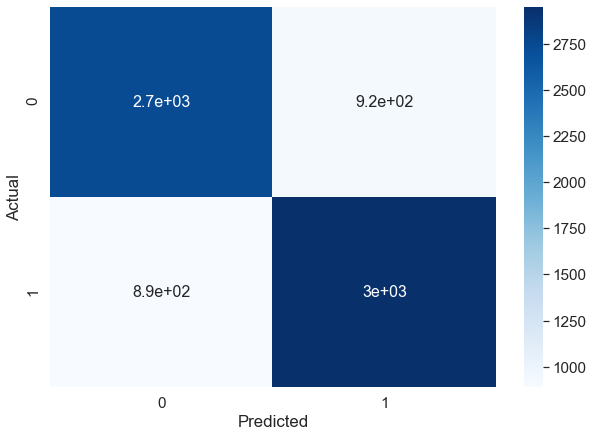

In [244]:
data = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [245]:
print('f1_score',round(f1_score(y_test, test_pred), 2))
print('recall_score',round(recall_score(y_test, test_pred), 2))
print('precision_score',round(precision_score(y_test, test_pred), 2))
print('accuracy_score',round(accuracy_score(y_test, test_pred), 2))

f1_score 0.76
recall_score 0.77
precision_score 0.76
accuracy_score 0.76


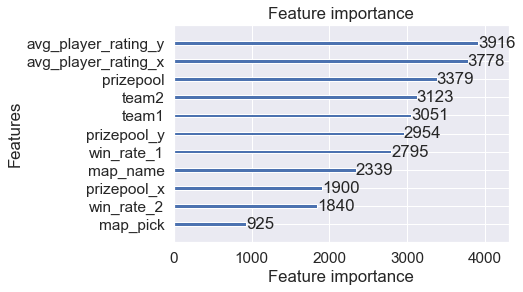

In [246]:
lgb.plot_importance(model)

In [47]:
  
"""
Optuna example that optimizes a classifier configuration for cancer dataset using LightGBM tuner.
In this example, we optimize the validation log loss of cancer detection.
"""

import numpy as np
import sklearn.datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import optuna.integration.lightgbm as lgb


if __name__ == "__main__":
    train_x, val_x, train_y, val_y = train_test_split(X, y, test_size = 0.33, random_state = 42)
    dtrain = lgb.Dataset(train_x, label=train_y)
    dval = lgb.Dataset(val_x, label=val_y)

    params = {
        "objective": "binary",
        "metric": "binary_logloss",
        "verbosity": -1,
        "boosting_type": "gbdt",
    }

    model = lgb.train(
        params, dtrain, valid_sets=[dtrain, dval], verbose_eval=1000, early_stopping_rounds=100
    )

    prediction = np.rint(model.predict(val_x, num_iteration=model.best_iteration))
    accuracy = accuracy_score(val_y, prediction)

    best_params = model.params
    print("Best params:", best_params)
    print("  Accuracy = {}".format(accuracy))
    print("  Params: ")
    for key, value in best_params.items():
        print("    {}: {}".format(key, value))

[I 2020-12-11 06:02:14,817] A new study created in memory with name: no-name-5185911d-8079-4da7-9e37-e85938c9efc1
feature_fraction, val_score: 0.658988:  14%|######4                                      | 1/7 [00:00<00:01,  4.92it/s]

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[117]	valid_0's binary_logloss: 0.58989	valid_1's binary_logloss: 0.658988
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[140]	valid_0's binary_logloss: 0.565166	valid_1's binary_logloss: 0.658155

feature_fraction, val_score: 0.658155:  29%|############8                                | 2/7 [00:00<00:01,  4.61it/s]


Training until validation scores don't improve for 100 rounds


feature_fraction, val_score: 0.658155:  43%|###################2                         | 3/7 [00:00<00:00,  4.57it/s]

Early stopping, best iteration is:
[128]	valid_0's binary_logloss: 0.572884	valid_1's binary_logloss: 0.659137
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[115]	valid_0's binary_logloss: 0.58632	valid_1's binary_logloss: 0.659123

feature_fraction, val_score: 0.658155:  57%|#########################7                   | 4/7 [00:00<00:00,  4.60it/s]


Training until validation scores don't improve for 100 rounds


feature_fraction, val_score: 0.658155:  71%|################################1            | 5/7 [00:01<00:00,  4.63it/s]

Early stopping, best iteration is:
[115]	valid_0's binary_logloss: 0.58632	valid_1's binary_logloss: 0.659123
Training until validation scores don't improve for 100 rounds


feature_fraction, val_score: 0.657492:  86%|######################################5      | 6/7 [00:01<00:00,  4.63it/s]

Early stopping, best iteration is:
[118]	valid_0's binary_logloss: 0.580916	valid_1's binary_logloss: 0.657492
Training until validation scores don't improve for 100 rounds


num_leaves, val_score: 0.657492:   0%|                                                          | 0/20 [00:00<?, ?it/s]

Early stopping, best iteration is:
[128]	valid_0's binary_logloss: 0.572884	valid_1's binary_logloss: 0.659137
Training until validation scores don't improve for 100 rounds


num_leaves, val_score: 0.657492:   5%|##5                                               | 1/20 [00:00<00:05,  3.76it/s]

Early stopping, best iteration is:
[46]	valid_0's binary_logloss: 0.561148	valid_1's binary_logloss: 0.662197
Training until validation scores don't improve for 100 rounds


num_leaves, val_score: 0.657492:  10%|#####                                             | 2/20 [00:00<00:04,  3.86it/s]

Early stopping, best iteration is:
[300]	valid_0's binary_logloss: 0.608429	valid_1's binary_logloss: 0.660793
Training until validation scores don't improve for 100 rounds


num_leaves, val_score: 0.657492:  15%|#######5                                          | 3/20 [00:00<00:04,  3.61it/s]

Early stopping, best iteration is:
[492]	valid_0's binary_logloss: 0.593303	valid_1's binary_logloss: 0.6603
Training until validation scores don't improve for 100 rounds


num_leaves, val_score: 0.657492:  20%|##########                                        | 4/20 [00:01<00:05,  2.93it/s]

Early stopping, best iteration is:
[30]	valid_0's binary_logloss: 0.521083	valid_1's binary_logloss: 0.661438
Training until validation scores don't improve for 100 rounds


num_leaves, val_score: 0.657492:  25%|############5                                     | 5/20 [00:01<00:05,  2.68it/s]

Early stopping, best iteration is:
[20]	valid_0's binary_logloss: 0.560017	valid_1's binary_logloss: 0.664803
Training until validation scores don't improve for 100 rounds


num_leaves, val_score: 0.657492:  30%|###############                                   | 6/20 [00:02<00:05,  2.74it/s]

Early stopping, best iteration is:
[30]	valid_0's binary_logloss: 0.558482	valid_1's binary_logloss: 0.662003
Training until validation scores don't improve for 100 rounds


num_leaves, val_score: 0.657492:  35%|#################5                                | 7/20 [00:02<00:04,  2.82it/s]

Early stopping, best iteration is:
[27]	valid_0's binary_logloss: 0.568187	valid_1's binary_logloss: 0.663429
Training until validation scores don't improve for 100 rounds


num_leaves, val_score: 0.657492:  40%|####################                              | 8/20 [00:02<00:03,  3.10it/s]

Early stopping, best iteration is:
[35]	valid_0's binary_logloss: 0.58585	valid_1's binary_logloss: 0.660834
Training until validation scores don't improve for 100 rounds


num_leaves, val_score: 0.657492:  45%|######################5                           | 9/20 [00:03<00:03,  2.85it/s]

Early stopping, best iteration is:
[35]	valid_0's binary_logloss: 0.52318	valid_1's binary_logloss: 0.663548
Training until validation scores don't improve for 100 rounds


num_leaves, val_score: 0.657492:  50%|########################5                        | 10/20 [00:03<00:03,  3.16it/s]

Early stopping, best iteration is:
[77]	valid_0's binary_logloss: 0.56975	valid_1's binary_logloss: 0.661064
Training until validation scores don't improve for 100 rounds


num_leaves, val_score: 0.657492:  55%|##########################9                      | 11/20 [00:03<00:03,  2.48it/s]

Early stopping, best iteration is:
[30]	valid_0's binary_logloss: 0.531835	valid_1's binary_logloss: 0.663045
Training until validation scores don't improve for 100 rounds


num_leaves, val_score: 0.657492:  60%|#############################4                   | 12/20 [00:04<00:02,  2.74it/s]

Early stopping, best iteration is:
[95]	valid_0's binary_logloss: 0.588471	valid_1's binary_logloss: 0.660562
Training until validation scores don't improve for 100 rounds


num_leaves, val_score: 0.657492:  65%|###############################8                 | 13/20 [00:04<00:02,  2.58it/s]

Early stopping, best iteration is:
[32]	valid_0's binary_logloss: 0.541448	valid_1's binary_logloss: 0.661992
Training until validation scores don't improve for 100 rounds


num_leaves, val_score: 0.657492:  70%|##################################3              | 14/20 [00:04<00:02,  2.83it/s]

Early stopping, best iteration is:
[30]	valid_0's binary_logloss: 0.585788	valid_1's binary_logloss: 0.66058
Training until validation scores don't improve for 100 rounds


num_leaves, val_score: 0.657492:  75%|####################################7            | 15/20 [00:05<00:01,  3.10it/s]

Early stopping, best iteration is:
[86]	valid_0's binary_logloss: 0.56356	valid_1's binary_logloss: 0.660564
Training until validation scores don't improve for 100 rounds


num_leaves, val_score: 0.657492:  80%|#######################################2         | 16/20 [00:05<00:01,  3.00it/s]

Early stopping, best iteration is:
[41]	valid_0's binary_logloss: 0.545217	valid_1's binary_logloss: 0.662749
Training until validation scores don't improve for 100 rounds


num_leaves, val_score: 0.657492:  85%|#########################################6       | 17/20 [00:06<00:01,  2.60it/s]

Early stopping, best iteration is:
[31]	valid_0's binary_logloss: 0.530785	valid_1's binary_logloss: 0.66223
Training until validation scores don't improve for 100 rounds


num_leaves, val_score: 0.657492:  90%|############################################1    | 18/20 [00:06<00:00,  2.81it/s]

Early stopping, best iteration is:
[80]	valid_0's binary_logloss: 0.555383	valid_1's binary_logloss: 0.659412
Training until validation scores don't improve for 100 rounds


num_leaves, val_score: 0.657492:  95%|##############################################5  | 19/20 [00:06<00:00,  2.84it/s]

Early stopping, best iteration is:
[35]	valid_0's binary_logloss: 0.562314	valid_1's binary_logloss: 0.66054
Training until validation scores don't improve for 100 rounds


bagging, val_score: 0.657492:   0%|                                                             | 0/10 [00:00<?, ?it/s]

Early stopping, best iteration is:
[35]	valid_0's binary_logloss: 0.540423	valid_1's binary_logloss: 0.661522
Training until validation scores don't improve for 100 rounds


bagging, val_score: 0.657492:  10%|#####3                                               | 1/10 [00:00<00:02,  3.10it/s]

Early stopping, best iteration is:
[137]	valid_0's binary_logloss: 0.571164	valid_1's binary_logloss: 0.660082
Training until validation scores don't improve for 100 rounds


bagging, val_score: 0.657492:  20%|##########6                                          | 2/10 [00:00<00:02,  3.44it/s]

Early stopping, best iteration is:
[54]	valid_0's binary_logloss: 0.619882	valid_1's binary_logloss: 0.664723
Training until validation scores don't improve for 100 rounds


bagging, val_score: 0.657492:  30%|###############9                                     | 3/10 [00:00<00:01,  3.55it/s]

Early stopping, best iteration is:
[118]	valid_0's binary_logloss: 0.579242	valid_1's binary_logloss: 0.659134
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[56]	valid_0's binary_logloss: 0.621505	valid_1's binary_logloss: 0.665659

bagging, val_score: 0.657492:  40%|#####################2                               | 4/10 [00:01<00:01,  3.86it/s]


Training until validation scores don't improve for 100 rounds


bagging, val_score: 0.657492:  50%|##########################5                          | 5/10 [00:01<00:01,  3.67it/s]

Early stopping, best iteration is:
[116]	valid_0's binary_logloss: 0.581736	valid_1's binary_logloss: 0.66038
Training until validation scores don't improve for 100 rounds


bagging, val_score: 0.657492:  60%|###############################8                     | 6/10 [00:01<00:01,  3.40it/s]

Early stopping, best iteration is:
[121]	valid_0's binary_logloss: 0.578336	valid_1's binary_logloss: 0.659661
Training until validation scores don't improve for 100 rounds


bagging, val_score: 0.657492:  70%|#####################################                | 7/10 [00:01<00:00,  3.45it/s]

Early stopping, best iteration is:
[82]	valid_0's binary_logloss: 0.601438	valid_1's binary_logloss: 0.664463
Training until validation scores don't improve for 100 rounds


bagging, val_score: 0.657492:  80%|##########################################4          | 8/10 [00:02<00:00,  3.50it/s]

Early stopping, best iteration is:
[118]	valid_0's binary_logloss: 0.580474	valid_1's binary_logloss: 0.660991
Training until validation scores don't improve for 100 rounds


bagging, val_score: 0.657492:  90%|###############################################7     | 9/10 [00:02<00:00,  3.32it/s]

Early stopping, best iteration is:
[118]	valid_0's binary_logloss: 0.582616	valid_1's binary_logloss: 0.662463
Training until validation scores don't improve for 100 rounds


feature_fraction_stage2, val_score: 0.657492:   0%|                                              | 0/6 [00:00<?, ?it/s]

Early stopping, best iteration is:
[95]	valid_0's binary_logloss: 0.591174	valid_1's binary_logloss: 0.659201
Training until validation scores don't improve for 100 rounds


feature_fraction_stage2, val_score: 0.657492:  17%|######3                               | 1/6 [00:00<00:01,  3.40it/s]

Early stopping, best iteration is:
[118]	valid_0's binary_logloss: 0.580916	valid_1's binary_logloss: 0.657492
Training until validation scores don't improve for 100 rounds


feature_fraction_stage2, val_score: 0.657492:  33%|############6                         | 2/6 [00:00<00:01,  3.47it/s]

Early stopping, best iteration is:
[118]	valid_0's binary_logloss: 0.580916	valid_1's binary_logloss: 0.657492
Training until validation scores don't improve for 100 rounds


feature_fraction_stage2, val_score: 0.657492:  50%|###################                   | 3/6 [00:00<00:00,  3.66it/s]

Early stopping, best iteration is:
[118]	valid_0's binary_logloss: 0.580916	valid_1's binary_logloss: 0.657492
Training until validation scores don't improve for 100 rounds


feature_fraction_stage2, val_score: 0.657492:  67%|#########################3            | 4/6 [00:01<00:00,  3.83it/s]

Early stopping, best iteration is:
[118]	valid_0's binary_logloss: 0.580916	valid_1's binary_logloss: 0.657492
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[115]	valid_0's binary_logloss: 0.58632	valid_1's binary_logloss: 0.659123

feature_fraction_stage2, val_score: 0.657492:  83%|###############################6      | 5/6 [00:01<00:00,  4.08it/s]


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[118]	valid_0's binary_logloss: 0.580916	valid_1's binary_logloss: 0.657492

regularization_factors, val_score: 0.657492:   0%|                                              | 0/20 [00:00<?, ?it/s]


Training until validation scores don't improve for 100 rounds


regularization_factors, val_score: 0.657492:   5%|#9                                    | 1/20 [00:00<00:05,  3.17it/s]

Early stopping, best iteration is:
[126]	valid_0's binary_logloss: 0.576509	valid_1's binary_logloss: 0.658687
Training until validation scores don't improve for 100 rounds


regularization_factors, val_score: 0.657489:  10%|###8                                  | 2/20 [00:00<00:05,  3.36it/s]

Early stopping, best iteration is:
[118]	valid_0's binary_logloss: 0.580916	valid_1's binary_logloss: 0.657489
Training until validation scores don't improve for 100 rounds


regularization_factors, val_score: 0.657489:  15%|#####7                                | 3/20 [00:00<00:04,  3.48it/s]

Early stopping, best iteration is:
[118]	valid_0's binary_logloss: 0.580916	valid_1's binary_logloss: 0.657492
Training until validation scores don't improve for 100 rounds


regularization_factors, val_score: 0.657478:  20%|#######6                              | 4/20 [00:01<00:04,  3.59it/s]

Early stopping, best iteration is:
[118]	valid_0's binary_logloss: 0.580916	valid_1's binary_logloss: 0.657478
Training until validation scores don't improve for 100 rounds


regularization_factors, val_score: 0.657478:  25%|#########5                            | 5/20 [00:01<00:04,  3.61it/s]

Early stopping, best iteration is:
[118]	valid_0's binary_logloss: 0.580916	valid_1's binary_logloss: 0.657478
Training until validation scores don't improve for 100 rounds


regularization_factors, val_score: 0.657478:  30%|###########4                          | 6/20 [00:01<00:03,  3.69it/s]

Early stopping, best iteration is:
[118]	valid_0's binary_logloss: 0.580916	valid_1's binary_logloss: 0.657489
Training until validation scores don't improve for 100 rounds


regularization_factors, val_score: 0.657478:  35%|#############3                        | 7/20 [00:01<00:03,  3.74it/s]

Early stopping, best iteration is:
[118]	valid_0's binary_logloss: 0.580916	valid_1's binary_logloss: 0.657495
Training until validation scores don't improve for 100 rounds


regularization_factors, val_score: 0.657478:  40%|###############2                      | 8/20 [00:02<00:03,  3.74it/s]

Early stopping, best iteration is:
[118]	valid_0's binary_logloss: 0.580916	valid_1's binary_logloss: 0.657487
Training until validation scores don't improve for 100 rounds


regularization_factors, val_score: 0.657478:  45%|#################1                    | 9/20 [00:02<00:03,  3.54it/s]

Early stopping, best iteration is:
[118]	valid_0's binary_logloss: 0.580916	valid_1's binary_logloss: 0.657482
Training until validation scores don't improve for 100 rounds


regularization_factors, val_score: 0.657478:  50%|##################5                  | 10/20 [00:02<00:02,  3.46it/s]

Early stopping, best iteration is:
[118]	valid_0's binary_logloss: 0.580916	valid_1's binary_logloss: 0.657478
Training until validation scores don't improve for 100 rounds


regularization_factors, val_score: 0.657478:  55%|####################3                | 11/20 [00:03<00:02,  3.30it/s]

Early stopping, best iteration is:
[118]	valid_0's binary_logloss: 0.580916	valid_1's binary_logloss: 0.657487
Training until validation scores don't improve for 100 rounds


regularization_factors, val_score: 0.657478:  60%|######################2              | 12/20 [00:03<00:02,  3.25it/s]

Early stopping, best iteration is:
[118]	valid_0's binary_logloss: 0.580916	valid_1's binary_logloss: 0.657484
Training until validation scores don't improve for 100 rounds


regularization_factors, val_score: 0.657478:  65%|########################             | 13/20 [00:03<00:02,  3.19it/s]

Early stopping, best iteration is:
[118]	valid_0's binary_logloss: 0.580916	valid_1's binary_logloss: 0.657484
Training until validation scores don't improve for 100 rounds


regularization_factors, val_score: 0.657478:  70%|#########################9           | 14/20 [00:04<00:01,  3.08it/s]

Early stopping, best iteration is:
[118]	valid_0's binary_logloss: 0.580916	valid_1's binary_logloss: 0.657484
Training until validation scores don't improve for 100 rounds


regularization_factors, val_score: 0.657478:  75%|###########################7         | 15/20 [00:04<00:01,  3.09it/s]

Early stopping, best iteration is:
[118]	valid_0's binary_logloss: 0.580916	valid_1's binary_logloss: 0.657484
Training until validation scores don't improve for 100 rounds


regularization_factors, val_score: 0.657478:  80%|#############################6       | 16/20 [00:04<00:01,  3.18it/s]

Early stopping, best iteration is:
[118]	valid_0's binary_logloss: 0.580916	valid_1's binary_logloss: 0.657487
Training until validation scores don't improve for 100 rounds


regularization_factors, val_score: 0.657478:  85%|###############################4     | 17/20 [00:05<00:00,  3.20it/s]

Early stopping, best iteration is:
[118]	valid_0's binary_logloss: 0.580916	valid_1's binary_logloss: 0.657484
Training until validation scores don't improve for 100 rounds


regularization_factors, val_score: 0.657478:  90%|#################################3   | 18/20 [00:05<00:00,  3.41it/s]

Early stopping, best iteration is:
[118]	valid_0's binary_logloss: 0.580917	valid_1's binary_logloss: 0.657484
Training until validation scores don't improve for 100 rounds


regularization_factors, val_score: 0.657478:  95%|###################################1 | 19/20 [00:05<00:00,  3.37it/s]

Early stopping, best iteration is:
[118]	valid_0's binary_logloss: 0.580917	valid_1's binary_logloss: 0.65748
Training until validation scores don't improve for 100 rounds


min_data_in_leaf, val_score: 0.657478:   0%|                                                     | 0/5 [00:00<?, ?it/s]

Early stopping, best iteration is:
[118]	valid_0's binary_logloss: 0.580918	valid_1's binary_logloss: 0.657492
Training until validation scores don't improve for 100 rounds


min_data_in_leaf, val_score: 0.657478:  20%|#########                                    | 1/5 [00:00<00:01,  3.22it/s]

Early stopping, best iteration is:
[128]	valid_0's binary_logloss: 0.58605	valid_1's binary_logloss: 0.659262
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[82]	valid_0's binary_logloss: 0.597375	valid_1's binary_logloss: 0.659438

min_data_in_leaf, val_score: 0.657478:  40%|##################                           | 2/5 [00:00<00:00,  3.58it/s]


Training until validation scores don't improve for 100 rounds


min_data_in_leaf, val_score: 0.657478:  60%|###########################                  | 3/5 [00:00<00:00,  3.63it/s]

Early stopping, best iteration is:
[159]	valid_0's binary_logloss: 0.557363	valid_1's binary_logloss: 0.660671
Training until validation scores don't improve for 100 rounds


min_data_in_leaf, val_score: 0.657478:  80%|####################################         | 4/5 [00:01<00:00,  3.44it/s]

Early stopping, best iteration is:
[145]	valid_0's binary_logloss: 0.587189	valid_1's binary_logloss: 0.659678
Training until validation scores don't improve for 100 rounds


min_data_in_leaf, val_score: 0.657478: 100%|#############################################| 5/5 [00:01<00:00,  3.70it/s]

Early stopping, best iteration is:
[124]	valid_0's binary_logloss: 0.579592	valid_1's binary_logloss: 0.660443
Best params: {'objective': 'binary', 'metric': 'binary_logloss', 'verbosity': -1, 'boosting_type': 'gbdt', 'feature_pre_filter': False, 'lambda_l1': 2.5141958847072593e-08, 'lambda_l2': 1.737560825483342e-08, 'num_leaves': 31, 'feature_fraction': 0.7, 'bagging_fraction': 1.0, 'bagging_freq': 0, 'min_child_samples': 20, 'num_iterations': 1000, 'early_stopping_round': 100}
  Accuracy = 0.5992
  Params: 
    objective: binary
    metric: binary_logloss
    verbosity: -1
    boosting_type: gbdt
    feature_pre_filter: False
    lambda_l1: 2.5141958847072593e-08
    lambda_l2: 1.737560825483342e-08
    num_leaves: 31
    feature_fraction: 0.7
    bagging_fraction: 1.0
    bagging_freq: 0
    min_child_samples: 20
    num_iterations: 1000
    early_stopping_round: 100
